In [ ]:
%tensorflow_version 1.x

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

In [2]:
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) #ADD

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "data/train", #ADD
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "data/test",#ADD 
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


Found 771 images belonging to 3 classes.
Found 773 images belonging to 3 classes.


C:\Users\DMC CONET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
12/12 [==============================] - 36s 1s/step - loss: 80.1667 - acc: 0.5707 - val_loss: 32.4436 - val_acc: 0.5679
Epoch 2/10
12/12 [==============================] - 12s 1s/step - loss: 10.6955 - acc: 0.7419 - val_loss: 19.1334 - val_acc: 0.5343
Epoch 3/10
12/12 [==============================] - 12s 1s/step - loss: 6.4507 - acc: 0.7536 - val_loss: 4.9200 - val_acc: 0.6624
Epoch 4/10
12/12 [==============================] - 13s 1s/step - loss: 2.6058 - acc: 0.8119 - val_loss: 2.7265 - val_acc: 0.6546
Epoch 5/10
12/12 [==============================] - 12s 1s/step - loss: 1.6571 - acc: 0.7756 - val_loss: 2.5263 - val_acc: 0.6960
Epoch 6/10
12/12 [==============================] - 13s 1s/step - loss: 1.1744 - acc: 0.8029 - val_loss: 1.3191 - val_acc: 0.6455
Epoch 7/10
12/12 [==============================] - 12s 1s/step - loss: 1.0699 - acc: 0.8132 - val_loss: 1.0879 - val_acc: 0.6792
Epoch 8/10
12/12 [==============================] - 12s 1s/step - loss: 1.2332 - acc: 

C:\Users\DMC CONET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss= 1.6212124824523926
acc= 0.5239327549934387


C:\Users\DMC CONET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


predicted category index = 1
predicted category name = early


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback

from IPython.display import clear_output

class PlotLosses(Callback):

    def on_train_begin(self, logs={}):

        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        # plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.losses, label="loss",  color='y')
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])


In [ ]:
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

## collback 적용


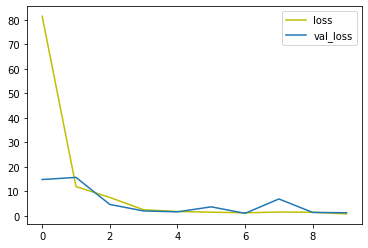

loss =  0.8417606949806213 , val_loss =  1.332733392715454


C:\Users\DMC CONET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss= 1.332733392715454
acc= 0.6261319518089294


C:\Users\DMC CONET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


predicted category index = 2
predicted category name = normal


In [4]:
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) #ADD

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "data/train", #ADD
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "data/test",#ADD 
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10,
      callbacks=callbacks
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

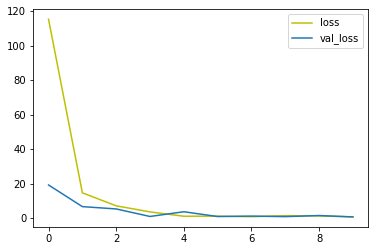

loss =  0.7807751893997192 , val_loss =  0.7589390277862549
loss= 0.7589390277862549
acc= 0.6300129294395447
predicted category index = 0
predicted category name = advanced


In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications import densenet

conv_layers = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) #ADD

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=densenet.preprocess_input
).flow_from_directory(
      "data/train", #ADD
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=densenet.preprocess_input
).flow_from_directory(
      "data/test",#ADD 
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10,
      callbacks=callbacks
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [8]:
import tensorflow as tf
print(tf.__version__)

2.5.0
